In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Let's start by analyzing the colors file
filename = 'D:\LEGO dataset files\colors.csv'
df= pd.read_csv(filename, header=0)
print(df.head())
print(df.shape)

   id            name     rgb is_trans
0  -1         Unknown  0033B2        f
1   0           Black  05131D        f
2   1            Blue  0055BF        f
3   2           Green  237841        f
4   3  Dark Turquoise  008F9B        f
(135, 4)


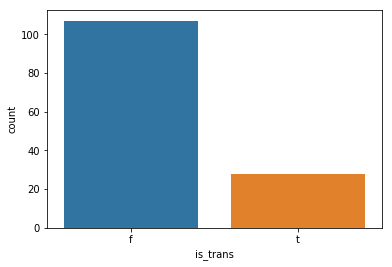

In [4]:
sns.countplot(x='is_trans',data=df)
plt.show()

In [20]:
file2 = 'D:\LEGO dataset files\inventory_parts.csv'
df2 = pd.read_csv(file2)
df2.head()

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f
3,1,paddle,0,1,f
4,3,11816pr0005,78,1,f


Let's Merge these two on color_id

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640985 entries, 0 to 640984
Data columns (total 5 columns):
inventory_id    640985 non-null int64
part_num        640985 non-null object
color_id        640985 non-null int64
quantity        640985 non-null int64
is_spare        640985 non-null object
dtypes: int64(3), object(2)
memory usage: 24.5+ MB


In [ ]:
df2 = df2.groupby('color_id')['quantity'].sum()

In [ ]:
df2 = pd.DataFrame(df2)

In [45]:
df2.head()

,quantity
color_id,
-1,50
0,428943
1,125323
2,42232
3,1227


Let's merge these 2 dataframes on id color

In [46]:
merged = pd.merge(left=df,right=df2,left_on='id',right_index=True,how='inner')
merged.head()

,id,name,rgb,is_trans,quantity
0,-1,Unknown,0033B2,f,50
1,0,Black,05131D,f,428943
2,1,Blue,0055BF,f,125323
3,2,Green,237841,f,42232
4,3,Dark Turquoise,008F9B,f,1227


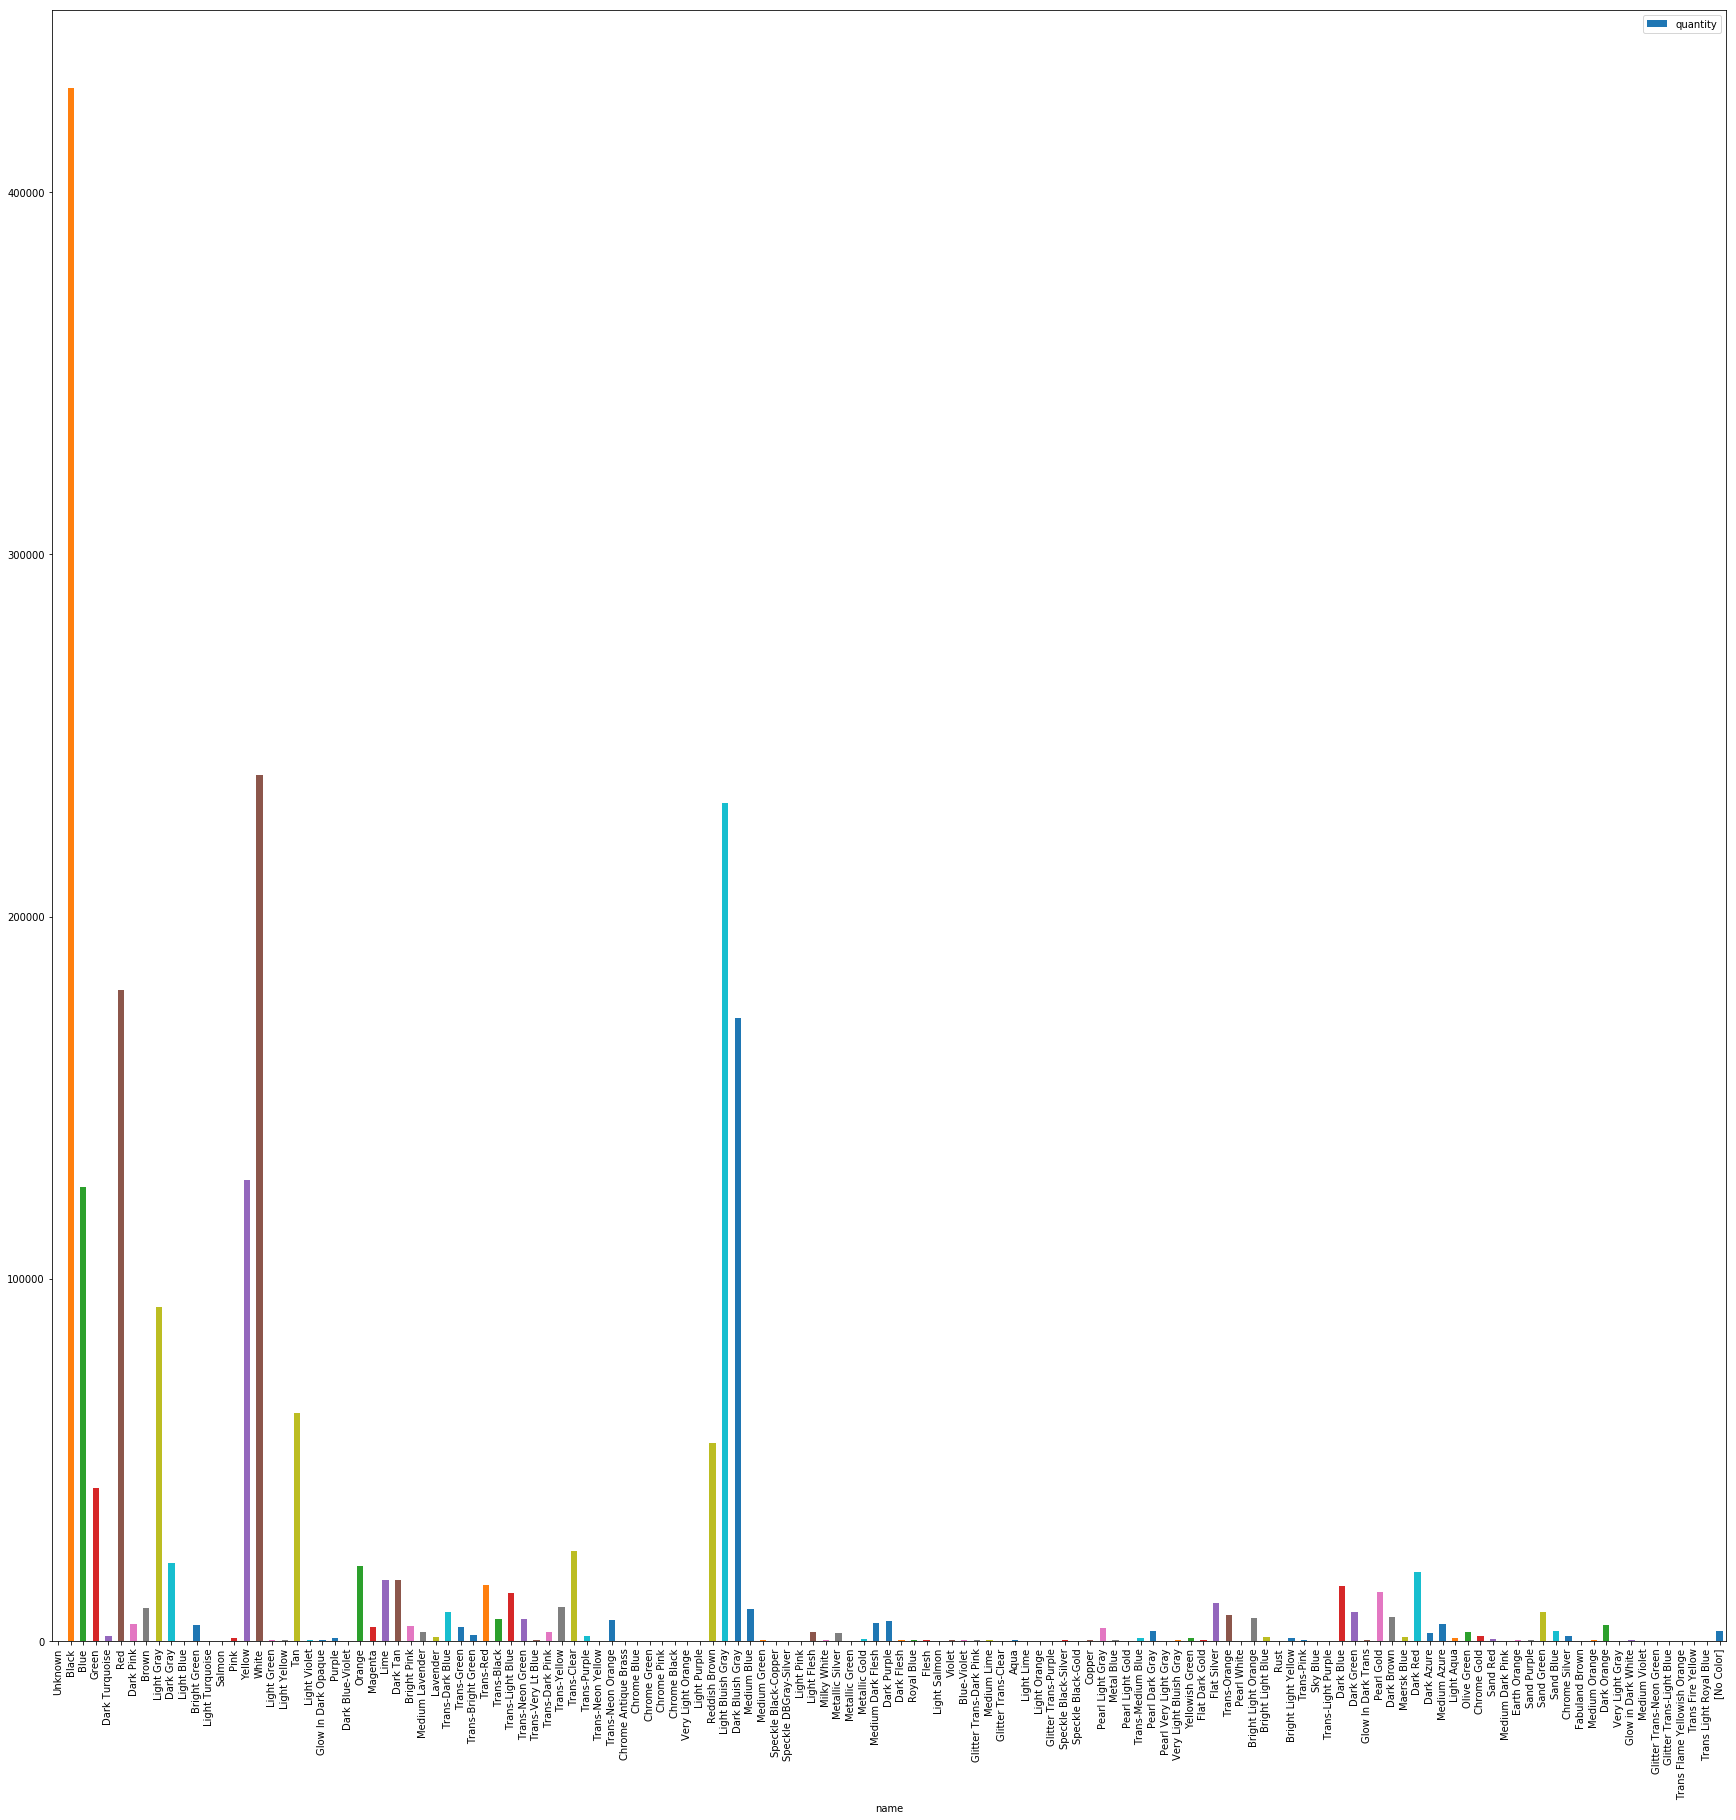

In [55]:
merged.plot(x='name',y='quantity',kind='bar',figsize=(30,30))
plt.show()

In [56]:
file3 = 'D:\LEGO dataset files\inventories.csv'
df3 = pd.read_csv(file3)
df3.head()

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [60]:
file4 = 'D:\LEGO dataset files\sets.csv'
df4 = pd.read_csv(file4)
df4.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [61]:
print(df4.isnull().sum())
print(df4.shape)

set_num      0
name         0
year         0
theme_id     0
num_parts    0
dtype: int64
(12345, 5)


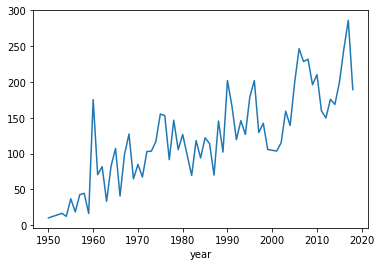

In [69]:
# Let's study how the average number of parts have changed over the years for lego sets. 
Average_by_year = df4.groupby('year')['num_parts'].mean()
Average_by_year.plot()
plt.show()